# 1.Load dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot,download_plotlyjs
from scipy import stats
import random
from scipy.stats import ttest_ind

In [2]:
cf.go_offline()
init_notebook_mode(connected=True)

In [3]:
sd=pd.read_csv('datasets/StudentsPerformance.csv')

In [4]:
#head
sd.head(10)

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
5                    none          71             83             78  
6               completed          88             95             92  
7                    none          40             43             39  
8               completed          64             64             67  
9                    none          38             60             50

In [5]:
sd['avg']=(sd['math score']+sd['reading score']+sd['writing score'])//3

In [6]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
avg                            1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [7]:
sd.describe()

math score  reading score  writing score          avg
count  1000.00000    1000.000000    1000.000000  1000.000000
mean     66.08900      69.169000      68.054000    67.445000
std      15.16308      14.600192      15.195657    14.263324
min       0.00000      17.000000      10.000000     9.000000
25%      57.00000      59.000000      57.750000    58.000000
50%      66.00000      70.000000      69.000000    68.000000
75%      77.00000      79.000000      79.000000    77.000000
max     100.00000     100.000000     100.000000   100.000000

In [8]:
sd.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
avg                            0
dtype: int64

# 2.EDA

## 2.1Univariate

### 2.1.1 Math  score 

In [9]:
sns.set_style('whitegrid')

/home/lytica/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/lytica/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



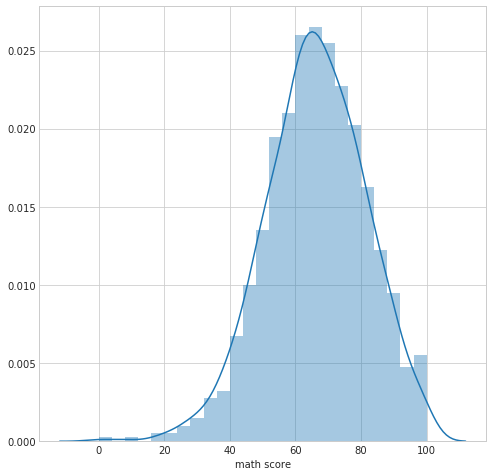

In [10]:
plt.figure(figsize=(8,8))
sns.distplot(sd['math score'])

In [11]:
print('Skewness is %f'%sd['math score'].skew())
print('Kurtosis is %f'%sd['math score'].kurt())

Skewness is -0.278935
Kurtosis is 0.274964


In [12]:
passmark=40
sd['math_category']=np.where(sd['math score']<passmark,'F','P')

In [13]:
sd['math_category'].value_counts(normalize=True)

P    0.96
F    0.04
Name: math_category, dtype: float64

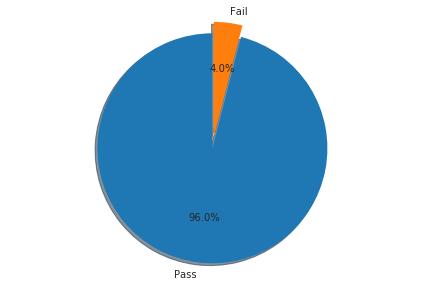

In [14]:
explode=(0,0.1)
fig,ax=plt.subplots()
ax.pie(sd['math_category'].value_counts(),labels=['Pass','Fail'],explode=explode,shadow=True,startangle=90,autopct='%1.1f%%')
ax.axis('equal')
plt.tight_layout()

1.96% passed

2.Math score is negatively skewed



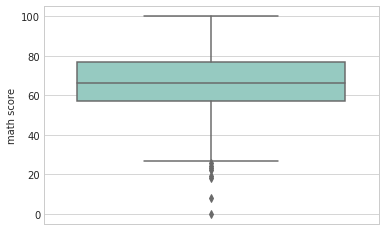

In [15]:
sns.boxplot(y='math score',palette='Set3',data=sd)

### 2.1.2 reading score

/home/lytica/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/lytica/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



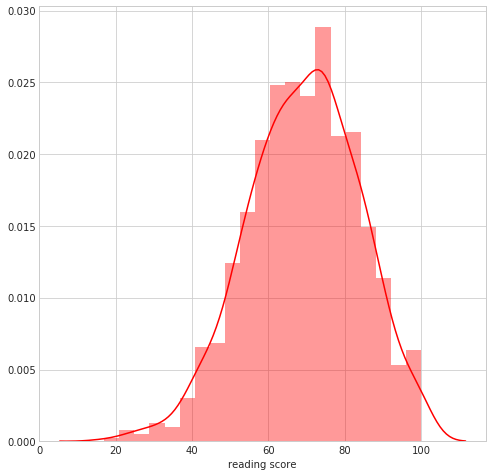

In [16]:
plt.figure(figsize=(8,8))
sns.distplot(sd['reading score'],color='r')

In [17]:
print('Skewness is %f'%sd['reading score'].skew())
print('Kurtosis is %f'%sd['reading score'].kurt())

Skewness is -0.259105
Kurtosis is -0.068265


In [18]:
sd['reading_cat']=np.where(sd['reading score']<passmark,'F','P')

In [19]:
sd['reading_cat'].value_counts(normalize=True)

P    0.974
F    0.026
Name: reading_cat, dtype: float64

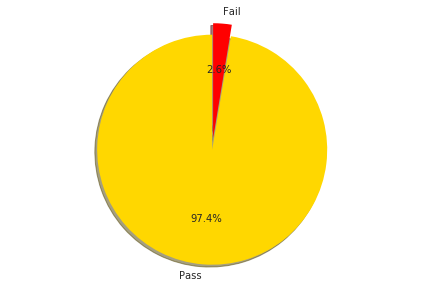

In [20]:
fig,ax=plt.subplots()
plt.pie(sd['reading_cat'].value_counts(),explode=explode,labels=['Pass','Fail'],shadow=True,startangle=90,autopct='%1.1f%%',colors=['gold','red'])
ax.axis('equal')
plt.tight_layout()

1.97.4 % passed

2.Negatively skewed

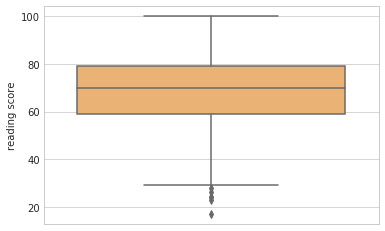

In [21]:
sns.boxplot(y='reading score',palette='Set3_r',data=sd)

### 2.1.3 Writing score 

/home/lytica/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/lytica/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



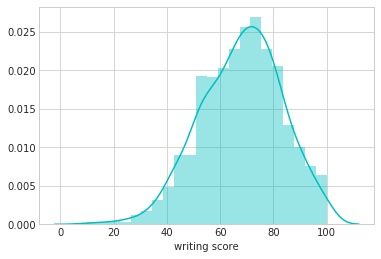

In [22]:
sns.distplot(sd['writing score'],color='c')

In [23]:
print('Skew is %f'%sd['writing score'].skew())
print('Kurtosis is %f'%sd['writing score'].kurt())

Skew is -0.289444
Kurtosis is -0.033365


In [24]:
sd['writing_cat']=np.where(sd['writing score']<passmark,'F','P')

In [25]:
sd['writing_cat'].value_counts(normalize=True)

P    0.968
F    0.032
Name: writing_cat, dtype: float64

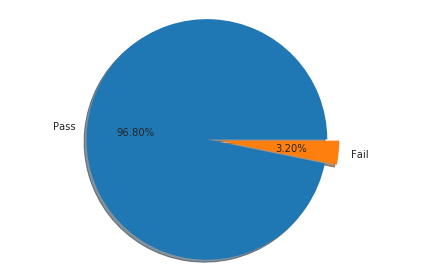

In [26]:
fig,ax=plt.subplots()
plt.pie(sd['writing_cat'].value_counts(),explode=explode,labels=['Pass','Fail'],shadow=True,autopct='%1.2f%%')
ax.axis('equal')
plt.tight_layout()

1.96.8% passed

2.Negatively skewed

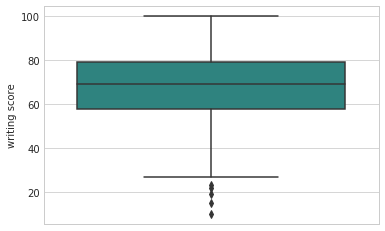

In [27]:
sns.boxplot(x='writing score',data=sd,orient='v',palette='viridis')

In [28]:
sd['Overall_status']=sd.apply(lambda x:'F' if x['math_category']=='F' or x['reading_cat']=='F' or x['writing_cat']=='F' else
                             'P',axis=1)

In [29]:
sd['Overall_status'].value_counts()

P    949
F     51
Name: Overall_status, dtype: int64

In [30]:
def find_grade(mark):
    if mark>=70:
        return 'A'
    elif mark>=60:
        return 'B'
    elif mark>=50:
        return 'C'
    elif mark>=40:
        return 'D'
    else:
        return 'E'
    

In [31]:
sd['Final grade']=sd.apply(lambda y:find_grade(y['avg']),axis=1)

### 2.1.4 Avg

/home/lytica/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/lytica/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



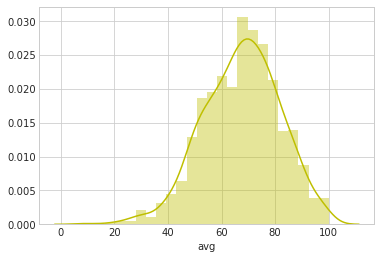

In [32]:
sns.distplot(sd['avg'],color='y')

In [33]:
print('Skew is %f'%sd['avg'].skew())
print('Kurtosis is %f'%sd['avg'].kurt())

Skew is -0.299326
Kurtosis is 0.115034


In [34]:
sd['avg_cat']=np.where(sd['avg']<40,'F','P')

In [35]:
vc=sd['avg_cat'].value_counts(normalize=True)

In [36]:
vc['P']

0.97

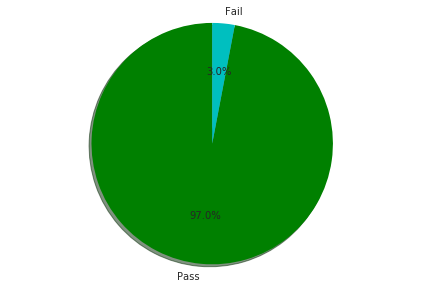

In [37]:
fig,ax=plt.subplots()
plt.pie(sd['avg_cat'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%',shadow=True,startangle=90,colors=['g','c'])
ax.axis('equal')
plt.tight_layout()

### 2.1.5 Gender 

In [38]:
def count(df,col,kind,yTitle,xTitle,title,color):
    
    t=df[col].value_counts(normalize=True)
    
    print(t*100)
    
    df[col].value_counts().iplot(kind=kind,xTitle=xTitle,yTitle=yTitle,title=title,color=color)

In [39]:
plt.figure(figsize=(6,6))
count(sd,'gender','bar','count','Gender','Count of genders','rgb(200,34,56)')


female    51.8
male      48.2
Name: gender, dtype: float64


<Figure size 432x432 with 0 Axes>

### 2.1.6 Race

In [40]:
sd.rename({'race/ethnicity':'race'},inplace=True,axis=1)

In [41]:
count(sd,'race','bar','count','Race','Count of race','rgb(100,100,255)')


group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race, dtype: float64


### 2.1.7 Parental level of education 

In [42]:
count(sd,'parental level of education','bar','count','Level','Count of level of education','rgb(100,255,255)')

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64


### 2.1.8 Lunch 

In [43]:
count(sd,'lunch','bar','count','Lunch type','Count of lunch type','rgb(10,100,255)')

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64


### 2.1.9 Test preperation

In [44]:
count(sd,'test preparation course','bar','count','Course','Count of preperation course','rgb(100,0,255)')

none         64.2
completed    35.8
Name: test preparation course, dtype: float64


### 2.1.10 Final grade

In [45]:
fn=sd['Final grade'].value_counts()

In [46]:
fn

A    459
B    256
C    182
D     73
E     30
Name: Final grade, dtype: int64

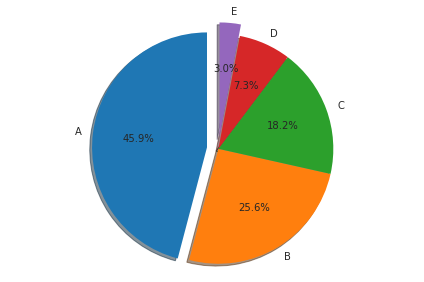

In [47]:
explode=[0.1,0.0,0.0,0.0,0.1]

fig,ax=plt.subplots()
plt.pie(sd['Final grade'].value_counts(),explode=explode,labels=['A','B','C','D','E'],shadow=True,startangle=90,
          autopct='%1.1f%%')
ax.axis('equal')
plt.tight_layout()

## 2.2 Multivariate 

### 2.2.1 Gender and race 

In [48]:
m=sd[sd['gender']=='male']
f=sd[sd['gender']=='female']


In [49]:
def plot(x,df,title,hue=None,palette='bright'):
    
    total=float(len(df))
    plt.figure(figsize=(8,8))
    ax=sns.countplot(x=x,hue=hue,palette=palette,data=df)
    ax.set_title(label=title)
    ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    for p in ax.patches:
        height=p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height+3,'{:1.2f}%'.format((height/total*100)),
            ha="center") 


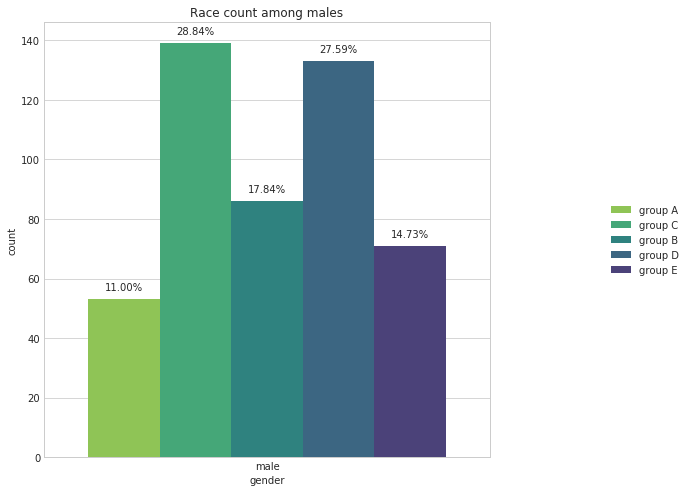

In [50]:
plot('gender',m,'Race count among males',hue='race',palette='viridis_r')

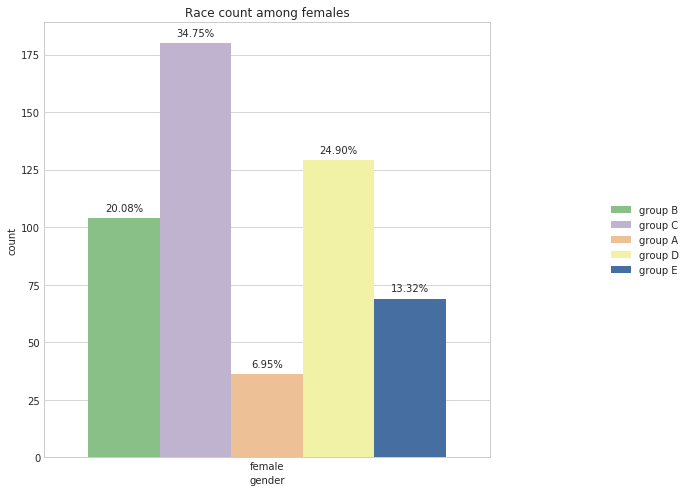

In [51]:
plot('gender',f,'Race count among females',hue='race',palette='Accent')

1.Race C is the most common among all Genders

2.34.75% of females come from race C 

3.28.84% of males come from race C

### 2.2.2 Gender and parental level of education

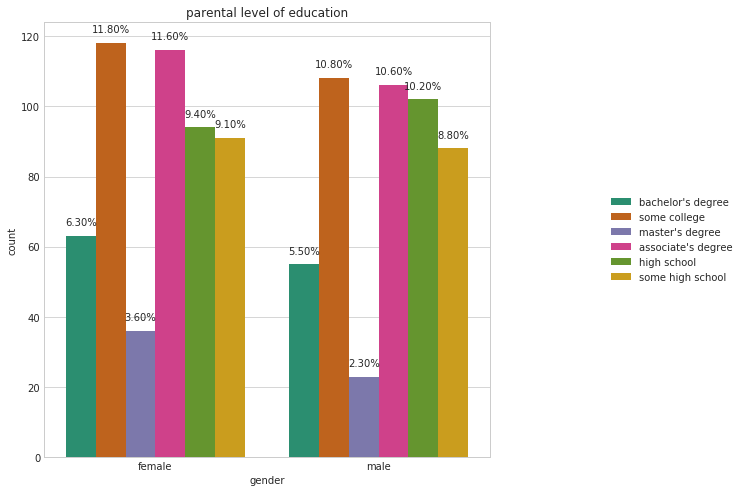

In [52]:
plot('gender',sd,'parental level of education',hue='parental level of education',palette='Dark2')

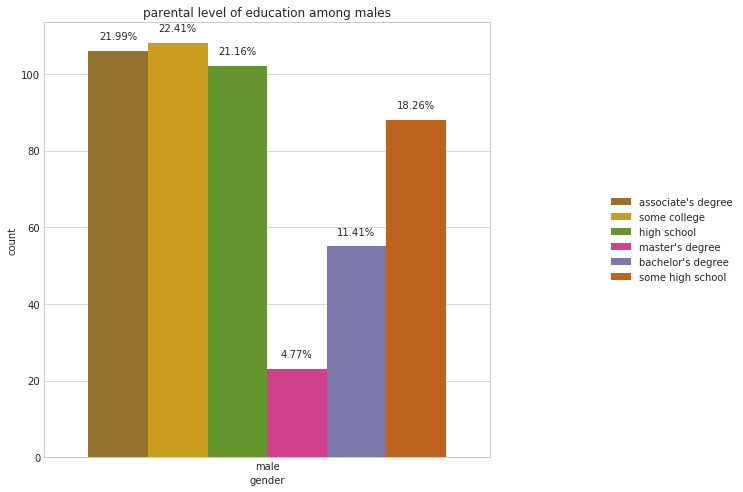

In [53]:
plot('gender',m,'parental level of education among males',hue='parental level of education',palette='Dark2_r')

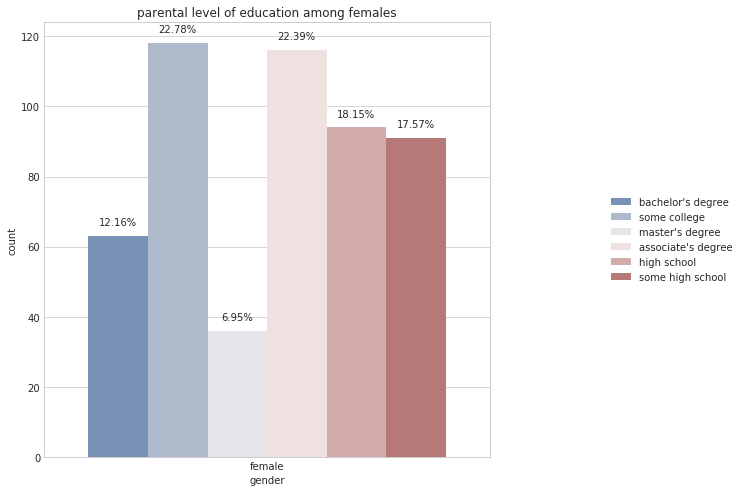

In [54]:
plot('gender',f,'parental level of education among females',hue='parental level of education',palette='vlag')

1.Parents with some college are  the highest in number.

2.They account 22.41% of males thus contributing 10.8% of total population

3.They account 22.78% of females thus contributing 11.8% of total population

4.Parents with masters degrees are the least in all genders

5.They account for 6.95% of females and 4.77% of males



### 2.2.3 Gender and lun

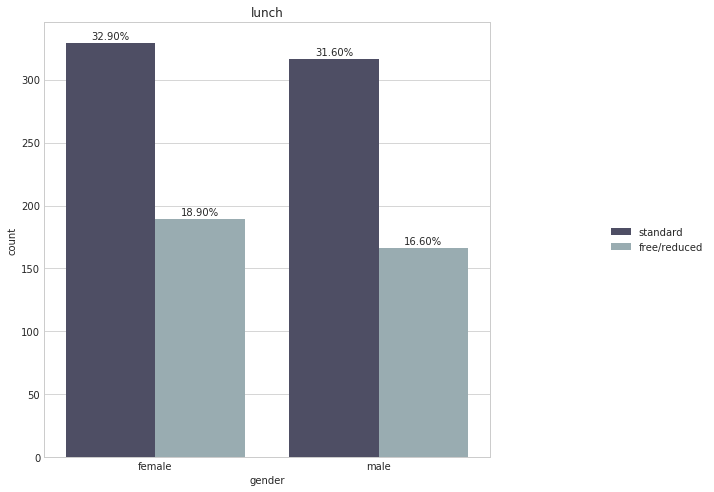

In [55]:
plot('gender',sd,'lunch',hue='lunch',palette='bone')

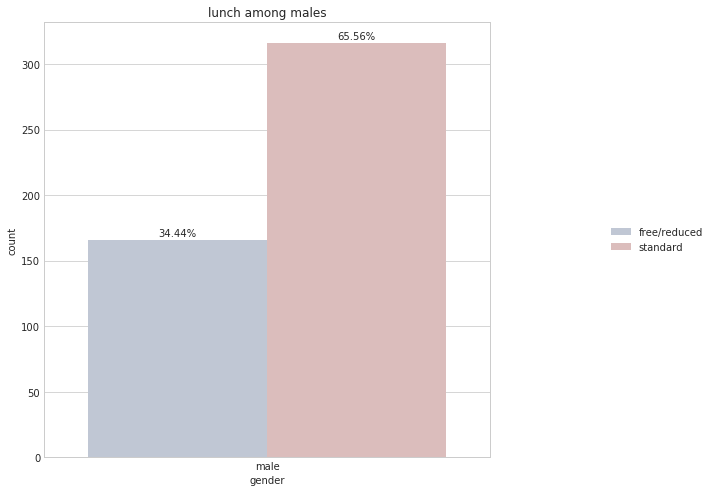

In [56]:
plot('gender',m,'lunch among males',hue='lunch',palette='vlag')

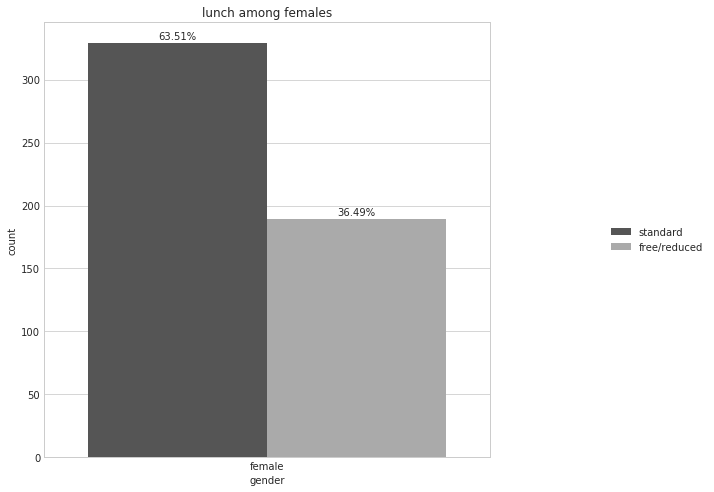

In [57]:
plot('gender',f,'lunch among females',hue='lunch',palette='gray')

1.Standard lunch is the most common

2.63.51% of females take standard lunch compared to 65.56% of males

### 2.2.4 Gender vs reading,writing and math score

In [58]:
sd.groupby(['gender'])['reading score'].mean().iplot(kind='bar',title='mean reading score among gender')

In [59]:
sd.groupby(['gender'])['writing score'].mean().iplot(kind='bar',title='mean writing score among gender',color='rgb(20,200,10)')

In [60]:
sd.groupby(['gender'])['math score'].mean().iplot(kind='bar',title='mean math score among gender',color='rgb(255,200,10)')

1.F have more means in writing and reading

2.Mean for F in reading is 72.6 and for M is 65.4

3.Mean for F in writing is72.4 and M is 63.3

4.Mean for F in math is 63.6 and F is 68.7


#### 2.2.4.1 Hypothesis testing 

In [61]:
def test_hypothesis(df,pvalue,group1,group2):
    
    
    group1=group1.values.tolist()
    group1=random.sample(group1,100)
    group2=group2.values.tolist()
    group2=random.sample(group2,100)
    ttest,pval=ttest_ind(group1,group2,equal_var=False)
    if pval<pvalue:
        print('Null hypothesis rejected')
        print('ttest is',ttest)
        print('pval is',pval)
    else:
        print('Accept null hypothesis')
        print('ttest is',ttest)
        print('pval is',pval)
        

1.Null hypothesis.There is no difference in mean of reading among genders

2.Alt hypothesis.There is difference in mean of reading among genders


In [62]:
male_reading_scores=m['reading score']
female_reading_scores=f['reading score']

In [63]:
test_hypothesis(sd,0.05,male_reading_scores,female_reading_scores)

Null hypothesis rejected
ttest is -3.690484824152189
pval is 0.00029239320496088914


1.Null hypothesis.There is no difference in mean of writing among genders

2.Alt hypothesis.There is difference in mean of writing among genders


In [64]:
male_writing_scores=m['writing score']
female_writing_scores=f['writing score']

In [65]:
test_hypothesis(sd,0.05,male_writing_scores,female_writing_scores)

Null hypothesis rejected
ttest is -4.35594817841427
pval is 2.1268373036327617e-05


In [66]:
male_math_scores=m['math score']
female_math_scores=f['math score']

1.Null hypothesis.There is no difference in mean of math among genders

2.Alt hypothesis.There is difference in mean of math among genders


In [67]:
test_hypothesis(sd,0.05,male_math_scores,female_math_scores)

Null hypothesis rejected
ttest is 3.4202356135018652
pval is 0.000759817662329473


### 2.2.5 Gender Vs final grade

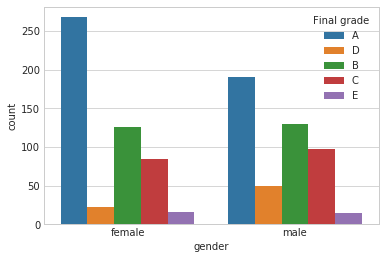

In [68]:
sns.countplot(x='gender',hue='Final grade',data=sd)

In [69]:
vc=sd['Final grade'].value_counts().reset_index()
vc.rename({'index':'grade','Final grade':'count'},inplace=True,axis=1)

In [70]:
vc_f=f['Final grade'].value_counts().reset_index()
vc_f.rename({'index':'grade','Final grade':'count'},inplace=True,axis=1)

In [71]:
vc_m=m['Final grade'].value_counts().reset_index()
vc_m.rename({'index':'grade','Final grade':'count'},inplace=True,axis=1)

In [72]:
vc_t=pd.merge(vc_f,vc_m,on='grade',suffixes=('_female','_male'))
vc_t=pd.merge(vc_t,vc,on='grade')
vc_t.rename({'count':'Total count'},inplace=True,axis=1)
vc_t['fr']=vc_t.count_female/vc_t['Total count']
vc_t['mr']=vc_t.count_male/vc_t['Total count']
vc_t

grade  count_female  count_male  Total count        fr        mr
0     A           268         191          459  0.583878  0.416122
1     B           126         130          256  0.492188  0.507812
2     C            85          97          182  0.467033  0.532967
3     D            23          50           73  0.315068  0.684932
4     E            16          14           30  0.533333  0.466667

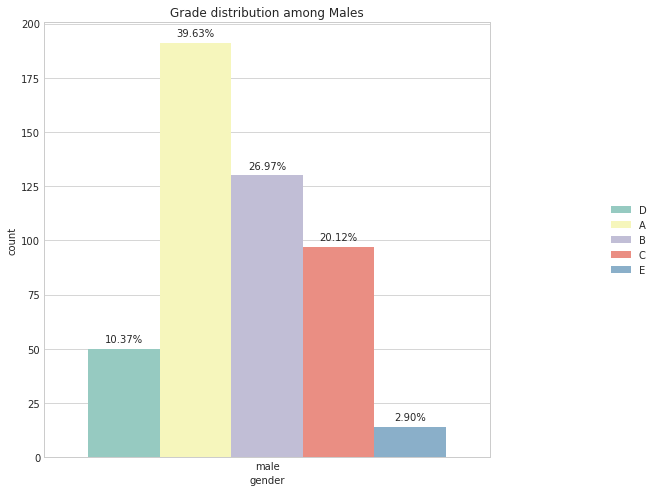

In [73]:
plot('gender',m,'Grade distribution among Males',hue='Final grade',palette='Set3')

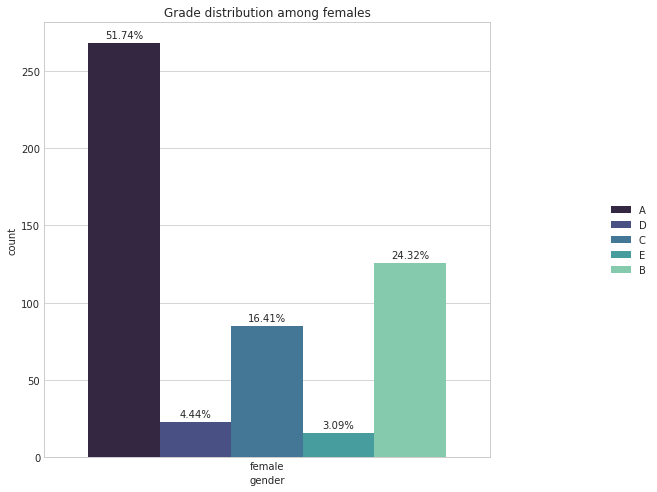

In [74]:
plot('gender',f,'Grade distribution among females',hue='Final grade',palette='mako')

1.51.74% of females got an A compared to 39.63% of males

2.26.97% of males score B compared to 24.32% of females

3 20.12% of males score C compared to 16.41% of females

4.10.17% of males scored a D compared to 4.44% of females

5.Females contributed 58% of A

6.Males contributed 68.39% od D

In [75]:
vc=sd.groupby('race')['Final grade'].value_counts()

### Race vs Final grade 

In [76]:
sd.groupby('race')['Final grade'].value_counts().iplot(kind='bar',color='rgb(12,67,89)')

### Parental level vs grade 

In [77]:
sd.groupby('parental level of education')['Final grade'].value_counts().iplot(kind='bar',color='rgb(122,67,89)')

### 2.2.6 Scores,lunch and test prperation 

/home/lytica/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



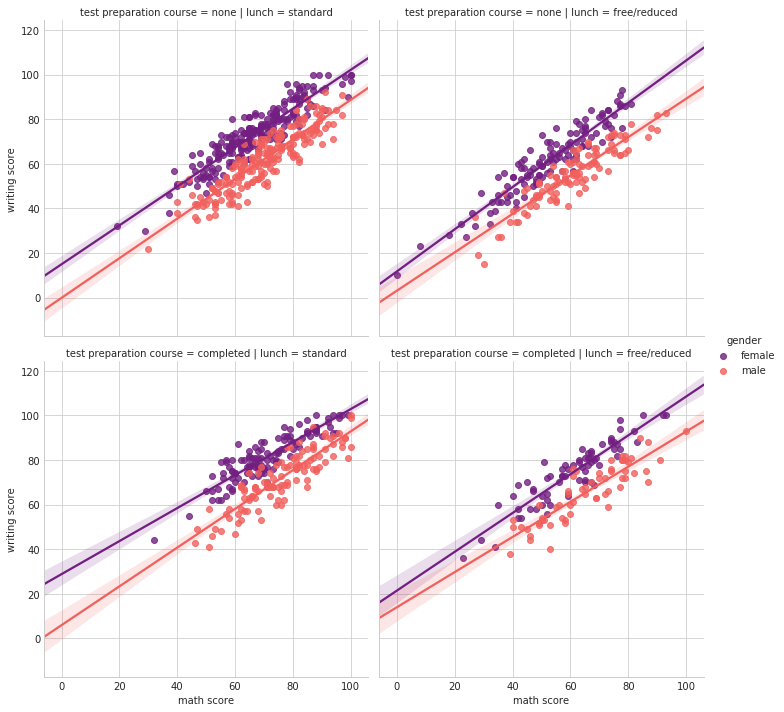

In [78]:
ax=sns.lmplot(x='math score',y='writing score',hue='gender',data=sd,col='lunch',row='test preparation course',palette='magma')


/home/lytica/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



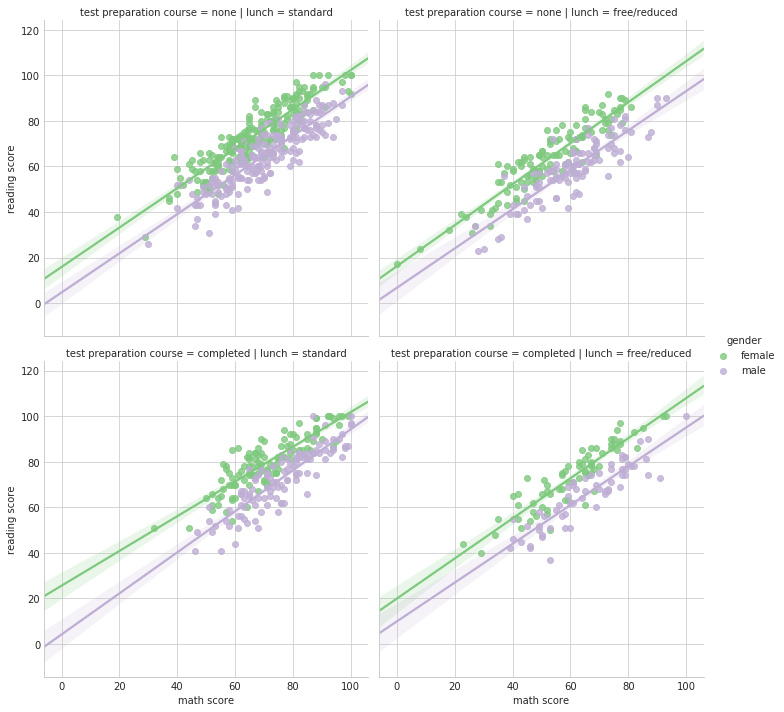

In [79]:
sns.lmplot(x='math score',y='reading score',hue='gender',data=sd,col='lunch',row='test preparation course',palette='Accent')

### 2.2.7 Level of education vs final grade and gender

In [80]:
s=sd.groupby('parental level of education')['Final grade'].value_counts(normalize=True).iplot(kind='bar',color='rgb(200,10,1)')

1.61% of students whose parents had a masters degree got an A

2.Students whose parents had some high school surpassed the number of A for those who completed high school

In [81]:
s=sd.groupby(['parental level of education','gender'])['Final grade'].value_counts(normalize=True).iplot(kind='bar',color='rgb(67,80,100)')

1.70% of males whose parents had a masters degree got an A compared to 55% of females

2.Females whose parents had a master degree didn't produce a C or D

3.Males whose parents had a masters degree didn't produce any E.Only 4.3% got a D

4.Females whose parents had a bachelor degree surpased had 66% getting an A compare to 55% of those whose parents had a masters degree

### 2.2.8 Test preperation vs Final Grade 

In [82]:
completed=sd[sd['test preparation course']=='completed']
none=sd[sd['test preparation course']=='none']

No handles with labels found to put in legend.


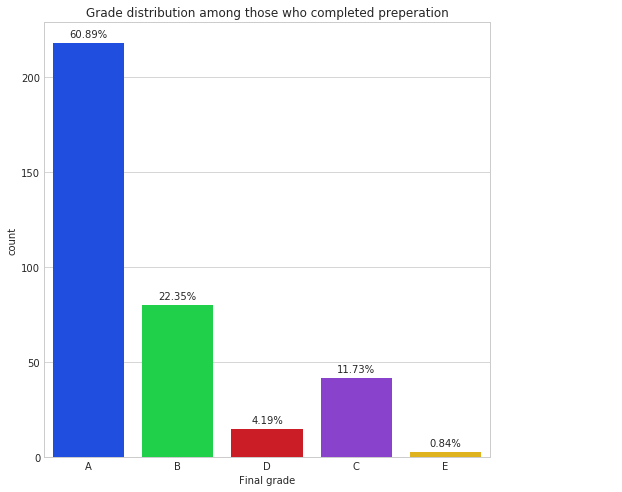

In [83]:
plot('Final grade',completed,'Grade distribution among those who completed preperation')

No handles with labels found to put in legend.


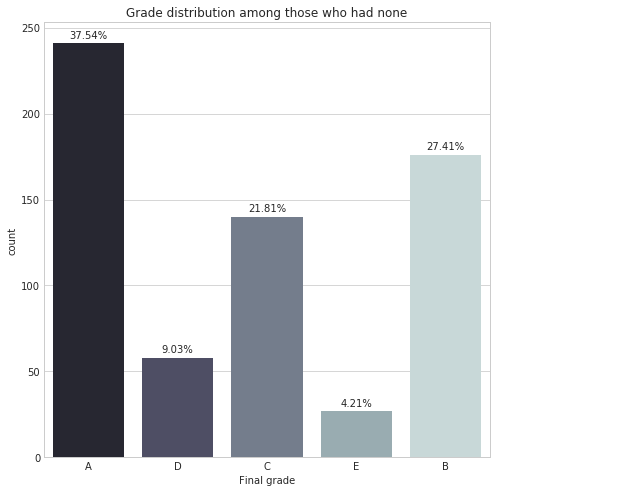

In [84]:
plot('Final grade',none,'Grade distribution among those who had none',palette='bone')

1.61% of those who completed the test preparation course had an A compare to 38% of those with none

2.0.84% of those who completed the test preparation course had E compared to 4.21 % of those who did not prepare

### 2.2.9 Lunch and Final grade

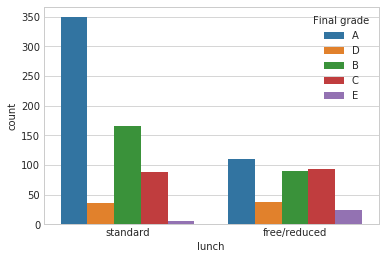

In [85]:
sns.countplot('lunch',hue='Final grade',data=sd)

In [86]:
sd.groupby(['lunch'])['Final grade'].value_counts(normalize=True).iplot(kind='bar',color='rgb(24,34,23)')

1.54% of those with standard lunch had an A compared to 30% of those that didn't

2.Only 0.9% of those who took standard lunch had an E compared to 6.7 of those under free/reduced


In [87]:
n=sd.groupby(['race'])['Final grade'].value_counts(normalize=True).iplot(kind='bar',color='rgb(24,56,78)')

1.Race E had most A with 62 % of them getting A

2.Race D followed with about 50%

3.Race C followed with 44.5%

4.Race B followed with 38%

5.Finally group A with 28%

### 2.2.10 Lunch test preperation and Race

In [88]:
lstc=sd[(sd['lunch']=='standard')&(sd['test preparation course']=='completed')]

In [89]:
lstc_vc=lstc['race'].value_counts().reset_index()
lstc_vc.rename({'index':'race','race':'count'},inplace=True,axis=1)

In [90]:
rc=sd['race'].value_counts().reset_index()
rc.rename({'index':'race','race':'count'},inplace=True,axis=1)

In [91]:
rc

race  count
0  group C    319
1  group D    262
2  group B    190
3  group E    140
4  group A     89

In [92]:
lstc_vc

race  count
0  group C     74
1  group D     49
2  group B     43
3  group E     40
4  group A     21

In [93]:
m=pd.merge(rc,lstc_vc,on='race',how='inner')
m['ratio']=m['count_y']/m['count_x']
m

race  count_x  count_y     ratio
0  group C      319       74  0.231975
1  group D      262       49  0.187023
2  group B      190       43  0.226316
3  group E      140       40  0.285714
4  group A       89       21  0.235955

Text(0.5, 1.0, 'Percentage by race of those who had standard lunch and completed test preparation course')

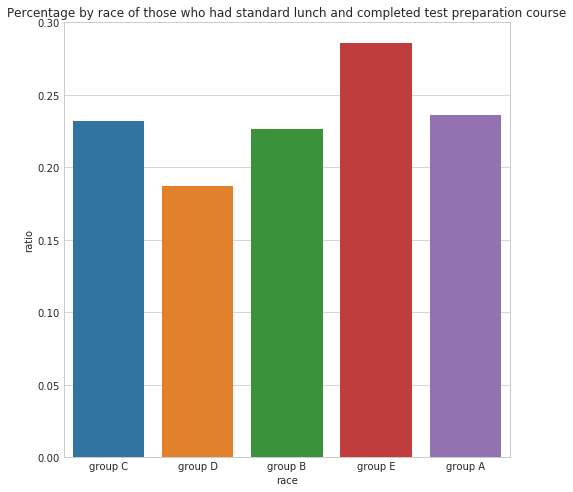

In [94]:
plt.figure(figsize=(8,8))
ax=sns.barplot(data=m,y='ratio',x='race')
ax.set_title('Percentage by race of those who had standard lunch and completed test preparation course')